In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# this part of the code loads one img from the mask dataset
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# The image has been uploa
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
    # Read the image into a numpy array first
    img_array = cv2.imread(filename)

    if img_array is None:
        print(f"Error: Could not read image file {filename}")
    else:
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)

        plt.show()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
#This code loads the entire face mask dataset. Make sure the data set folder is on google drive
# Assuming the path is /content/drive/xx/xx/xx
# If your images are in a different subfolder,  update this path.
image_directory = '/content/drive/My Drive/69000'

if os.path.exists(image_directory):
    print(f"Contents of '{image_directory}':")
    for item in os.listdir(image_directory):
        img_path = os.path.join(image_directory, item)
        img_array = cv2.imread(img_path)
        if img_array is not None:
            # Convert BGR to RGB for correct display with matplotlib
            img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            print(item)
            plt.imshow(img_rgb)
           # plt.axis("off") # Turn off axis to display only the image
            plt.show()
        else:
            print(f"Could not read image: {item}")
else:
    print(f"Directory not found: '{image_directory}'.  check the path.")

Directory not found: '/content/drive/My Drive/69000'.  check the path.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
drive.mount('/content/drive')

In [ ]:
# dataset/
#  ├── with_mask/
#  └── without_mask/
dataset_path = "/content/drive/MyDrive/69000"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = "nearest",
    validation_split = 0.2
)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    subset = "training"
)

val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    subset = "validation"
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/69000'

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False  # Freeze layers

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
EPOCHS = 10   # Increase to 20 for higher accuracy

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

NameError: name 'train_data' is not defined

In [ ]:
import os
import shutil

# Define the base directory where your images are currently located
base_dir = dataset_path # This is already defined as '/content/drive/MyDrive/69000'

# Define the paths for the new subfolders
with_mask_dir = os.path.join(base_dir, 'with_mask')
without_mask_dir = os.path.join(base_dir, 'without_mask')

# Create the subfolders if they don't exist
os.makedirs(with_mask_dir, exist_ok=True)
os.makedirs(without_mask_dir, exist_ok=True)

print(f"Created '{with_mask_dir}' and '{without_mask_dir}' directories.")

# Iterate through all files in the base directory
for filename in os.listdir(base_dir):
    # Only process image files (you might need to adjust extensions)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        source_path = os.path.join(base_dir, filename)

        # Determine the destination based on the filename convention
        if '_Mask' in filename: # Assuming files with '_Mask' are 'with mask'
            destination_path = os.path.join(with_mask_dir, filename)
        else: # All other image files are considered 'without mask'
            destination_path = os.path.join(without_mask_dir, filename)

        # Move the file
        shutil.move(source_path, destination_path)
        print(f"Moved '{filename}' to '{os.path.basename(os.path.dirname(destination_path))}'")

print("Image organization complete.")

Created '/content/drive/MyDrive/69000/with_mask' and '/content/drive/MyDrive/69000/without_mask' directories.
Image organization complete.


NameError: name 'history' is not defined

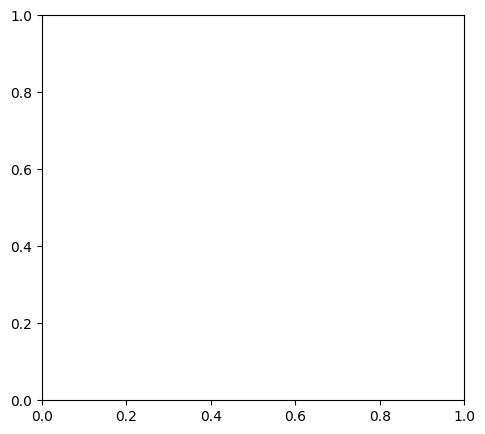

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

First, let's re-run the `ImageDataGenerator` to load the images from the organized subfolders.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = "nearest",
    validation_split = 0.2
)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    subset = "training"
)

val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    subset = "validation"
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


Now that the data generators are updated, we can re-run `model.fit()` to train the model.

In [ ]:
EPOCHS = 10   # Increase to 20 for higher accuracy

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
model.save("/content/mask_detector_model.h5")
print("Model saved as mask_detector_model.h5")

Model saved as mask_detector_model.h5


In [ ]:
def predict_mask(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    img_norm = img_resized / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_input)[0][0]

    if pred < 0.5:
        label = "With Mask"
        color = (0,255,0)
    else:
        label = "Without Mask"
        color = (0,0,255)

    cv2.putText(img, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Display
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
test_image = '/content/drive/MyDrive/dataset/with_mask/69000_Mask.jpg' # Corrected path
predict_mask(test_image)

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import os

with_mask_dir = '/content/drive/MyDrive/69000/with_mask'

if os.path.exists(with_mask_dir):
    print(f"Contents of '{with_mask_dir}':")
    for item in os.listdir(with_mask_dir):
        print(item)
else:
    print(f"Directory not found: '{with_mask_dir}'")

Contents of '/content/drive/MyDrive/69000/with_mask':


In [ ]:
import os

dataset_root = '/content/drive/MyDrive/dataset'
with_mask_subfolder = os.path.join(dataset_root, 'with_mask')
without_mask_subfolder = os.path.join(dataset_root, 'without_mask')

print(f"\n--- Contents of '{dataset_root}' ---")
if os.path.exists(dataset_root):
    root_contents = os.listdir(dataset_root)
    if root_contents:
        for item in root_contents:
            print(item)
    else:
        print("Directory is empty or contains no visible files.")
else:
    print("Directory not found.")

print(f"\n--- Contents of '{with_mask_subfolder}' ---")
if os.path.exists(with_mask_subfolder):
    with_mask_contents = os.listdir(with_mask_subfolder)
    if with_mask_contents:
        for item in with_mask_contents:
            print(item)
    else:
        print("Directory is empty or contains no visible files.")
else:
    print("Directory not found.")

print(f"\n--- Contents of '{without_mask_subfolder}' ---")
if os.path.exists(without_mask_subfolder):
    without_mask_contents = os.listdir(without_mask_subfolder)
    if without_mask_contents:
        for item in without_mask_contents:
            print(item)
    else:
        print("Directory is empty or contains no visible files.")
else:
    print("Directory not found.")


--- Contents of '/content/drive/MyDrive/dataset' ---
Directory not found.

--- Contents of '/content/drive/MyDrive/dataset/with_mask' ---
Directory not found.

--- Contents of '/content/drive/MyDrive/dataset/without_mask' ---
Directory not found.
